<strong style="font-size: 50px;">EDA</strong>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Kinematics_Data.csv")

In [5]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
# Drop unnecessary columns
df.drop(columns=["date", "username", "wrist", "time"], inplace=True)

In [59]:
# Replace names/labels
df['activity'] = df['activity'].replace({0: 'walking[noConvulsions]', 1: 'running[Convulsions]'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity        88588 non-null  int64  
 1   acceleration_x  88588 non-null  float64
 2   acceleration_y  88588 non-null  float64
 3   acceleration_z  88588 non-null  float64
 4   gyro_x          88588 non-null  float64
 5   gyro_y          88588 non-null  float64
 6   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.7 MB


In [62]:
df['activity'].unique()

array(['walking[noConvulsions]', 'running[Convulsions]'], dtype=object)

In [7]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


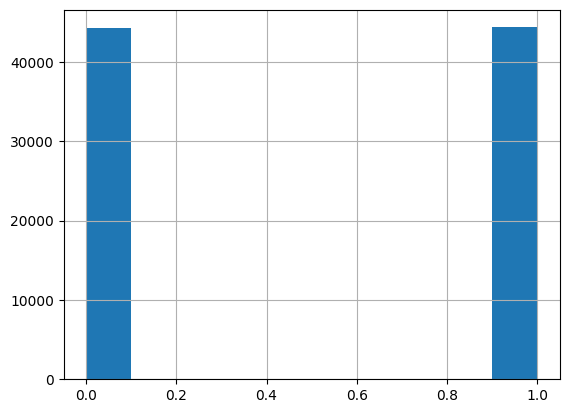

In [13]:
# Check for imbalance
df['activity'].value_counts()
df['activity'].hist(bins=10);

<strong style="font-size: 50px;">SPLITTING DATA</strong>

<strong style="font-size: 30px;">
    <code>
    0: Walking => No convulsions
    1: Running => Convulsions
    </code>
</strong>

In [14]:
target = 'activity'
y = df[target]
X = df.drop(columns=target)

In [15]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.33, random_state=42)

In [16]:
X_train.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
77386,0.1248,-0.9639,-0.1289,0.1370,3.0972,0.0588
61379,0.6582,0.3590,-0.8375,-0.6977,-0.6435,-3.6945
54799,-0.2007,-0.1754,0.1220,0.4007,-1.0399,-0.7537
12789,-2.0388,-0.1770,-0.2392,1.9371,0.8875,1.7828
33035,-0.1635,-0.4766,-0.0746,-0.9139,-0.6624,2.0334


In [17]:
len(y_test)

8771

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [19]:
cls = {
    "DF": DecisionTreeClassifier(random_state=42),
    "RF": RandomForestClassifier(random_state=42)
}

for i in range(len(list(cls))):
    cl = list(cls.values())[i]

    # Train model
    cl.fit(X_train, y_train)

    # Make predictions
    y_train_pred = cl.predict(X_train)
    y_val_pred = cl.predict(X_val)

    # Evaluate training performance
    cl_train_acc = accuracy_score(y_train, y_train_pred)
    cl_train_ps = precision_score(y_train, y_train_pred)
    cl_train_rs = recall_score(y_train, y_train_pred)

    # Evaluate validation performance
    cl_val_acc = accuracy_score(y_val, y_val_pred)
    cl_val_ps = precision_score(y_val, y_val_pred)
    cl_val_rs = recall_score(y_val, y_val_pred)

    print(list(cls.keys())[i])
    print("Model performance -- Training")
    print(f"* Accuracy: {cl_train_acc}")
    print(f"* Precision: {cl_train_ps}")
    print(f"* Recall: {cl_train_rs}")
    print("***********************************************")
    print("Model performance -- Validation")
    print(f"* Accuracy: {cl_val_acc}")
    print(f"* Precision: {cl_val_ps}")
    print(f"* Recall: {cl_val_rs}")
    print("===================================================")
    print("\n")

DF
Model performance -- Training
* Accuracy: 1.0
* Precision: 1.0
* Recall: 1.0
***********************************************
Model performance -- Validation
* Accuracy: 0.98433112434011
* Precision: 0.9843203609701071
* Recall: 0.9842093390480487


RF
Model performance -- Training
* Accuracy: 1.0
* Precision: 1.0
* Recall: 1.0
***********************************************
Model performance -- Validation
* Accuracy: 0.991351229922498
* Precision: 0.9920921825576141
* Recall: 0.9905256034288292




In [24]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[30849,     0],
       [    0, 31162]])

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30849
           1       1.00      1.00      1.00     31162

    accuracy                           1.00     62011
   macro avg       1.00      1.00      1.00     62011
weighted avg       1.00      1.00      1.00     62011



In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
val_pred = model.predict(X_val)

In [29]:
print(f"Validation accuracy: {accuracy_score(y_val, val_pred)}")

Validation accuracy: 0.991351229922498


In [30]:
test_pred = model.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, test_pred)}")

Test accuracy: 0.9906510090069547


In [31]:
import pickle

In [32]:
with open('epitack_trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)